## Introduction to GeoPandas

> *Adds geospacial abilities to pandas*

Links
- [YouTube playlist by Jonathan Soma](https://www.youtube.com/playlist?list=PLewNEVDy7gq3DjrPDxGFLbHE4G2QWe8Qh)
- [GeoPandas Documentation](https://geopandas.org/en/stable/docs.html)

Outras bibliotecas
- Shapely - deals with geometric shapes
    - GEOS software
- Fiona - package to read and write files (shape files, GeoJSON)
    - OGR software
- pyproj - cartographic projections
    - PROJ.4
- descartes - mapping
- geopy - geocoding - locate the coordinates of addresses, cities, countries and landmarks
- Rtree - spatial indexing analysis
- PySAL - spatial analysis functions (more advanced than Rtree) - coloring maps
- numpy - math

O que é necessário instalar
- brew install gdal [download wheel](https://www.lfd.uci.edu/~gohlke/pythonlibs/#gdal) -> cd Dowloads -> python -m pip install nome_do_arquivo.whl
- pip install geos
- brew install spatialindex (parece que não precisa e não consegui instalar anyway)
- pip install pillow
- pip install pysal
- pip install geopandas
- pip install basemap
- pip install rtree

### 0. Bibliotecas

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

from shapely.geometry import Point, Polygon
from mpl_toolkits.basemap import Basemap
from geopy.geocoders import Nominatim
from geopy.geocoders import GoogleV3

%matplotlib inline

### 1. Shapefile contents

- shapefile - geometry of the shapes (.shp)
- database file - extra info (.dbf)
- projection file (.prj)
- index file (.shx)
- specify codepage for identifying the characterset to be used (.cpg)

Links
- [Another extensions](https://desktop.arcgis.com/en/arcmap/latest/manage-data/shapefiles/shapefile-file-extensions.htm)
- [Kaggle database - Shapefiles USA states](https://www.kaggle.com/datasets/nswitzer/usa-state-shapeflies)
- [Kaggle database - Shapefiles Brazil states](https://www.kaggle.com/datasets/rodsaldanha/brazilianstatesshapefiles)

In [50]:
# .shp file

states = gpd.read_file('states/cb_2018_us_state_500k.shp')
states.sort_values('NAME').head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
17,01,01779775,0400000US01,01,AL,Alabama,00,131174048583,4593327154,"MULTIPOLYGON (((-88.05338 30.50699, -88.05109 ..."
27,02,01785533,0400000US02,02,AK,Alaska,00,1478839695958,245481577452,"MULTIPOLYGON (((179.48246 51.98283, 179.48656 ..."
37,60,01802701,0400000US60,60,AS,American Samoa,00,197759063,1307243754,"MULTIPOLYGON (((-168.14582 -14.54791, -168.145..."
35,04,01779777,0400000US04,04,AZ,Arizona,00,294198551143,1027337603,"POLYGON ((-114.81629 32.50804, -114.81432 32.5..."
52,05,00068085,0400000US05,05,AR,Arkansas,00,134768872727,2962859592,"POLYGON ((-94.61783 36.49941, -94.61765 36.499..."


In [3]:
# .dbf file - seems exactly the same dataframe comparing with the above one

# gpd.read_file("states/cb_2018_us_state_500k.dbf").head()

(15.0, 75.0)

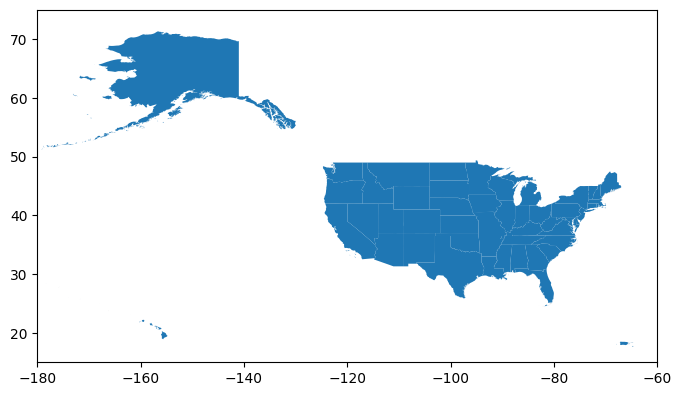

In [5]:
fig, ax = plt.subplots(figsize = (8, 8))

states.plot(ax = ax)

ax.set_xlim(-180, -60)
ax.set_ylim(15, 75)

### 2. Opening CSV files

1. opening up the CSV with pandas
2. take lat/lon feed it to shapely, which creates a Point
3. original dataframe + geometry => geodataframe
4. tell the new geodatafram that coords are latitude and longitude

Bases de dados
- [Database - United States Wind Turbine Database](https://atlas.eia.gov/datasets/eia::united-states-wind-turbine-database-uswtdb/explore)
- [Database - Power Plants in the US](https://hub.arcgis.com/datasets/fedmaps::power-plants-in-the-u-s--2/explore?location=43.023919%2C-88.108087%2C11.57)

In [6]:
df = pd.read_csv('states/Power_Plants_in_the_U.S..csv')
df = df[['Plant_Name', 'City', 'County', 'Zip', 'PrimSource', 'Total_MW', 'Longitude', 'Latitude']]

df.head()

,Plant_Name,City,County,Zip,PrimSource,Total_MW,Longitude,Latitude
0,Jack McDonough,Smyrna,Cobb,30080,natural gas,2535.0,-84.475800,33.823900
1,Lloyd Shoals,Jackson,Jasper,31024,hydroelectric,22.8,-83.841400,33.320700
2,Toadtown,Magalia,Butte,95954,hydroelectric,1.5,-121.593380,39.893491
3,McManus,Brunswick,Glynn,31523,petroleum,416.0,-81.546165,31.213645
4,Morgan Falls,Dunwoody,Fulton,30350,hydroelectric,10.5,-84.384100,33.968100


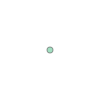

In [24]:
Point(-78, 41) # long, lat

In [7]:
# transformar a latitude e a longitude em pontos

points = df.apply(lambda row: Point(row.Longitude, row.Latitude), axis = 1)
points

0            POINT (-84.4758 33.8239)
1            POINT (-83.8414 33.3207)
2        POINT (-121.59338 39.893491)
3        POINT (-81.546165 31.213645)
4            POINT (-84.3841 33.9681)
                     ...             
11564    POINT (-85.212021 44.273592)
11565    POINT (-89.011483 37.829241)
11566    POINT (-88.952399 37.897506)
11567    POINT (-89.042423 37.836165)
11568    POINT (-89.433136 42.065653)
Length: 11569, dtype: object

In [8]:
# criar um geodataframe

powerplants = gpd.GeoDataFrame(df, geometry = points)
powerplants.crs = {'init': 'epsg:4326'}
powerplants.head()

c:\Users\Leticia\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,Plant_Name,City,County,Zip,PrimSource,Total_MW,Longitude,Latitude,geometry
0,Jack McDonough,Smyrna,Cobb,30080,natural gas,2535.0,-84.475800,33.823900,POINT (-84.47580 33.82390)
1,Lloyd Shoals,Jackson,Jasper,31024,hydroelectric,22.8,-83.841400,33.320700,POINT (-83.84140 33.32070)
2,Toadtown,Magalia,Butte,95954,hydroelectric,1.5,-121.593380,39.893491,POINT (-121.59338 39.89349)
3,McManus,Brunswick,Glynn,31523,petroleum,416.0,-81.546165,31.213645,POINT (-81.54617 31.21364)
4,Morgan Falls,Dunwoody,Fulton,30350,hydroelectric,10.5,-84.384100,33.968100,POINT (-84.38410 33.96810)


<Axes: >

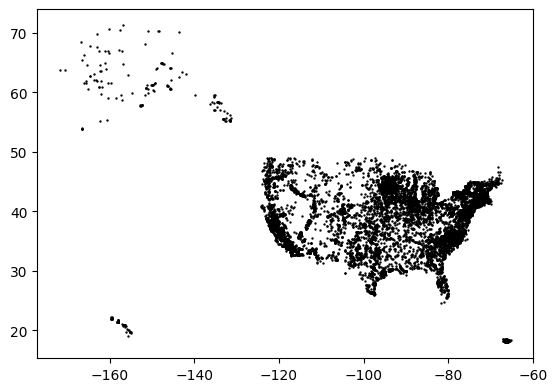

In [9]:
powerplants.plot(markersize = 0.5, c = 'black')

### 3. Coordinate Reference Systems (CRS)

Geographic coordinate system

- Ellipsoid - shape of the earth
- DATUM - where is the ellipsoid goes
- State plane system - bunch of different zones

Cada sistema de coordenadas tem um código EPSG (european petroleum survey group) diferente

IAU - international astronomic union

Nem sempre latitude e longitude são comparáveis

### 4. Customizing map projections

<Axes: >

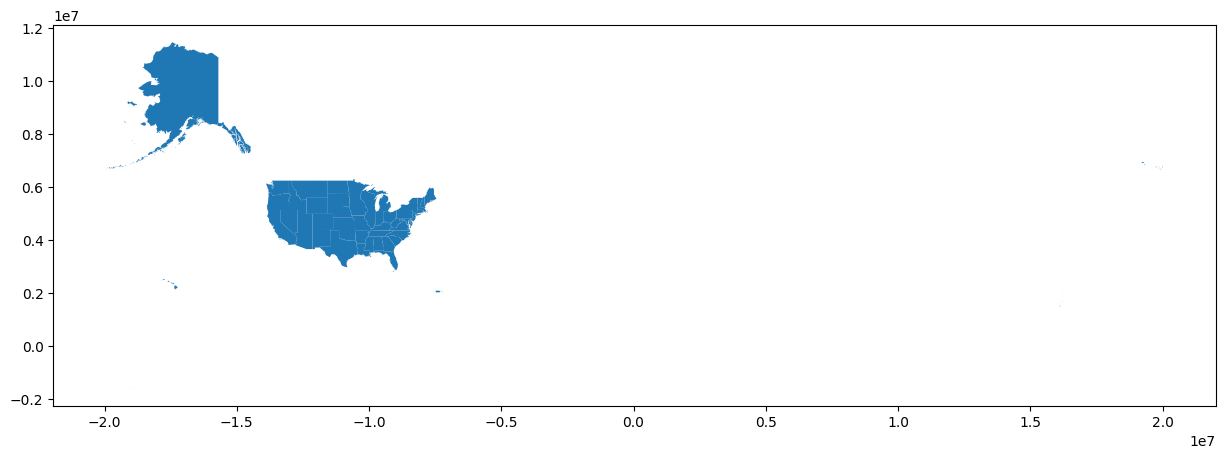

In [12]:
fig, ax = plt.subplots(figsize = (15, 15))

states.to_crs({'proj': 'merc'}).plot(ax = ax)

# ax.set_xlim(-180, -60)
# ax.set_ylim(15, 75)

<Axes: >

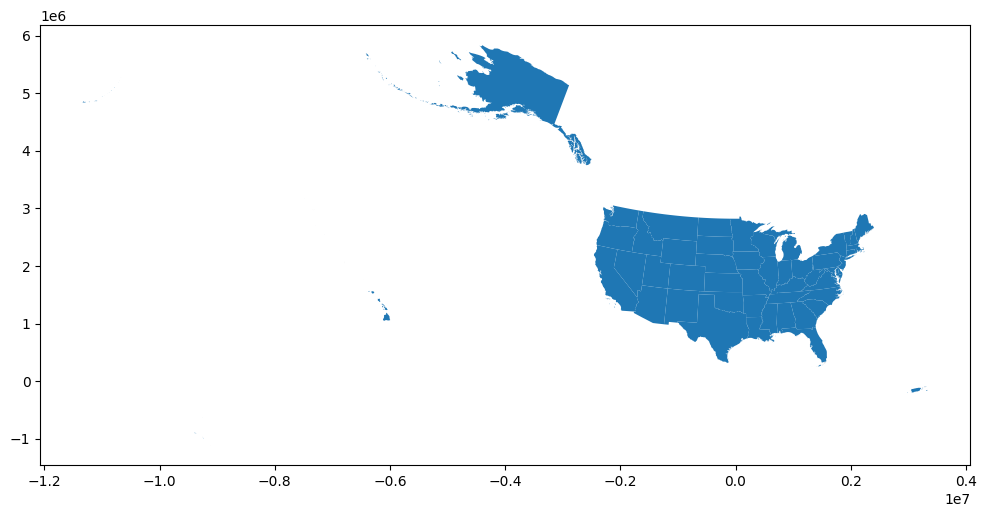

In [16]:
fig, ax = plt.subplots(figsize = (12, 12))

states.to_crs({
    'datum': 'NAD83',
    'no_defs': True,
    'proj': 'aea',
    'lat_1': 29.5,
    'lat_2': 25.5,
    'lat_0': 23,
    'lon_0': -96
}).plot(ax = ax)

(15.0, 75.0)

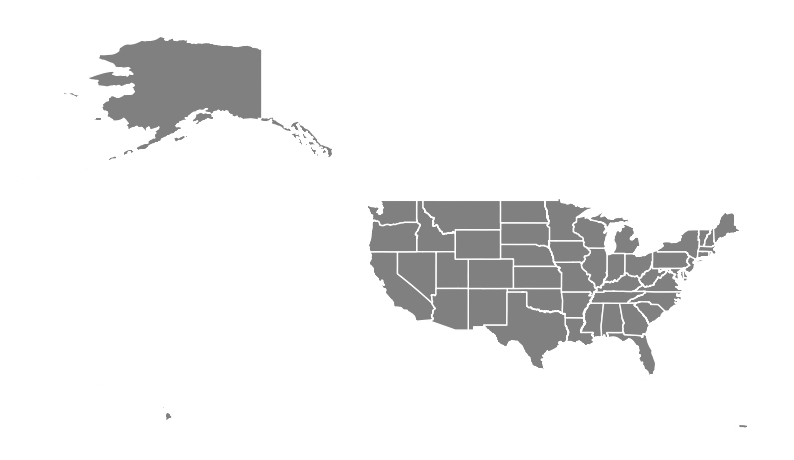

In [24]:
# pass parameter to .plot
# work with the ax variable

# coloring shape:
# 1. fill - inside part
# 2. stroke/line/edge - outline

ax = states.plot(figsize = (10, 10), color = 'gray', edgecolor = 'white', linewidth = 1)

ax.axis('off')

ax.set_xlim(-180, -60)
ax.set_ylim(15, 75)



In [29]:
type(powerplants)

geopandas.geodataframe.GeoDataFrame

### 5. Spatial joins in geopandas

In [34]:
states.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ..."
1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ..."
2,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,"POLYGON ((-103.00257 36.52659, -103.00219 36.6..."
3,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ..."
4,54,01779805,0400000US54,54,WV,West Virginia,00,62266474513,489028543,"POLYGON ((-82.64320 38.16909, -82.64300 38.169..."


In [35]:
powerplants.head()

,Plant_Name,City,County,Zip,PrimSource,Total_MW,Longitude,Latitude,geometry
0,Jack McDonough,Smyrna,Cobb,30080,natural gas,2535.0,-84.475800,33.823900,POINT (-84.47580 33.82390)
1,Lloyd Shoals,Jackson,Jasper,31024,hydroelectric,22.8,-83.841400,33.320700,POINT (-83.84140 33.32070)
2,Toadtown,Magalia,Butte,95954,hydroelectric,1.5,-121.593380,39.893491,POINT (-121.59338 39.89349)
3,McManus,Brunswick,Glynn,31523,petroleum,416.0,-81.546165,31.213645,POINT (-81.54617 31.21364)
4,Morgan Falls,Dunwoody,Fulton,30350,hydroelectric,10.5,-84.384100,33.968100,POINT (-84.38410 33.96810)


In [51]:
# tipo do dataframe e crs

print('States')
print('Type: ', type(states))
print('CRS:  ', states.crs)
print('\n')
print('Powerplants')
print('Type: ', type(powerplants))
print('CRS:  ', powerplants.crs)

States
Type:  <class 'geopandas.geodataframe.GeoDataFrame'>
CRS:   EPSG:4269


Powerplants
Type:  <class 'geopandas.geodataframe.GeoDataFrame'>
CRS:   +init=epsg:4326 +type=crs


In [52]:
states.to_crs(powerplants.crs, inplace = True)

In [53]:
states.crs

<Geographic 2D CRS: +init=epsg:4326 +type=crs>
Name: WGS 84
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [48]:
# ver as plantas que estão em algum estado

plants_with_states = gpd.sjoin(powerplants, 
                               states, 
                               how = 'inner', 
                               predicate = 'within') # pontos dentro dos polígonos

plants_with_states.head()

,Plant_Name,City,County,Zip,PrimSource,Total_MW,Longitude,Latitude,geometry,index_right,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER
0,Jack McDonough,Smyrna,Cobb,30080,natural gas,2535.0,-84.475800,33.823900,POINT (-84.47580 33.82390),18,13,01705317,0400000US13,13,GA,Georgia,00,149482048342,4422936154
1,Lloyd Shoals,Jackson,Jasper,31024,hydroelectric,22.8,-83.841400,33.320700,POINT (-83.84140 33.32070),18,13,01705317,0400000US13,13,GA,Georgia,00,149482048342,4422936154
3,McManus,Brunswick,Glynn,31523,petroleum,416.0,-81.546165,31.213645,POINT (-81.54617 31.21364),18,13,01705317,0400000US13,13,GA,Georgia,00,149482048342,4422936154
4,Morgan Falls,Dunwoody,Fulton,30350,hydroelectric,10.5,-84.384100,33.968100,POINT (-84.38410 33.96810),18,13,01705317,0400000US13,13,GA,Georgia,00,149482048342,4422936154
5,Nacoochee,Lakemont,Rabun,30523,hydroelectric,6.0,-83.501200,34.754900,POINT (-83.50120 34.75490),18,13,01705317,0400000US13,13,GA,Georgia,00,149482048342,4422936154


In [54]:
print(plants_with_states.shape)
print(powerplants.shape)

(11560, 19)
(11569, 9)


In [55]:
plants_with_states['NAME'].value_counts()

NAME
California              1640
North Carolina           855
New York                 735
Minnesota                713
Texas                    711
Massachusetts            586
New Jersey               358
Illinois                 316
Iowa                     278
Michigan                 261
Colorado                 251
Oregon                   251
Florida                  236
Georgia                  226
Pennsylvania             224
Wisconsin                200
Indiana                  193
South Carolina           190
Virginia                 183
Ohio                     173
Maryland                 158
Kansas                   157
Alaska                   150
Arizona                  146
Connecticut              146
Washington               144
Idaho                    138
New Mexico               133
Missouri                 129
Oklahoma                 129
Nebraska                 123
Maine                    122
Utah                     111
Vermont                  108
Nevada   

In [56]:
# ver os estados que possuem plantas

states_with_plants = gpd.sjoin(states, 
                               powerplants, 
                               how = 'inner', 
                               predicate = 'contains') # polígonos que contêm os pontos

states_with_plants.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry,index_right,Plant_Name,City,County,Zip,PrimSource,Total_MW,Longitude,Latitude
0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ...",505,Chevron Oil,Pascagoula,Jackson,39568,natural gas,137.0,-88.491900,30.340000
0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ...",9172,Gulfport Naval Base CSG PV System,Gulfport,Harrison,39501,solar,3.5,-89.119233,30.379866
0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ...",507,Jack Watson,Gulfport,Harrison,39501,natural gas,754.0,-89.028600,30.439200
0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ...",1317,Victor J Daniel Jr,Escatawpa,Jackson,39552,natural gas,2102.0,-88.555300,30.532200
0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ...",511,Benndale,Benndale,George,39452,natural gas,22.6,-88.805400,30.888900


### 6. Recombining data/building choropleths from spatial joins

In [68]:
megawatts_per_state = states.copy()
megawatts_per_state.set_index('NAME', inplace = True)

megawatts_per_state['megawatts'] = states_with_plants.groupby('NAME')['Total_MW'].sum()
megawatts_per_state.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,LSAD,ALAND,AWATER,geometry,megawatts
NAME,,,,,,,,,,
Mississippi,28,01779790,0400000US28,28,MS,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ...",14705.1
North Carolina,37,01027616,0400000US37,37,NC,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ...",35324.5
Oklahoma,40,01102857,0400000US40,40,OK,00,177662925723,3374587997,"POLYGON ((-103.00257 36.52659, -103.00219 36.6...",31126.4
Virginia,51,01779803,0400000US51,51,VA,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ...",28846.9
West Virginia,54,01779805,0400000US54,54,WV,00,62266474513,489028543,"POLYGON ((-82.64320 38.16909, -82.64300 38.169...",15072.5


(15.0, 75.0)

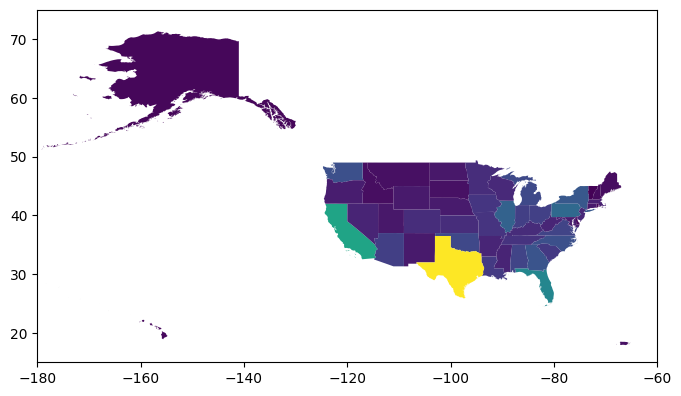

In [73]:
fig, ax = plt.subplots(figsize = (8, 8))

megawatts_per_state.plot(ax = ax, column = 'megawatts')

ax.set_xlim(-180, -60)
ax.set_ylim(15, 75)